In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
items = pd.read_csv("20191226-items.csv")
items.head()

asin     brand                                              title  \
0  B0000SX2UC       NaN  Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...   
1  B0009N5L7K  Motorola                                Motorola I265 phone   
2  B000SKTZ0S  Motorola  MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...   
3  B001AO4OUC  Motorola              Motorola i335 Cell Phone Boost Mobile   
4  B001DCJAJG  Motorola      Motorola V365 no contract cellular phone AT&T   

                                                 url  \
0  https://www.amazon.com/Dual-Band-Tri-Mode-Acti...   
1  https://www.amazon.com/Motorola-i265-I265-phon...   
2  https://www.amazon.com/MOTOROLA-C168i-CINGULAR...   
3  https://www.amazon.com/Motorola-i335-Phone-Boo...   
4  https://www.amazon.com/Motorola-V365-contract-...   

                                               image  rating  \
0  https://m.media-amazon.com/images/I/2143EBQ210...     3.0   
1  https://m.media-amazon.com/images/I/419WBAVDAR...     3.0   
2  https://m.media-amazon.com/images/I/71b+q3ydkI...     2.7   
3  https://m.media-amazon.com/images/I/710UO8gdT+...     3.3   
4  https://m.media-amazon.com/images/I/61LYNCVrrK...     3.1   

                                           reviewUrl  totalReviews   price  \
0  https://www.amazon.com/product-reviews/B0000SX2UC            14    0.00   
1  https://www.amazon.com/product-reviews/B0009N5L7K             7   49.95   
2  https://www.amazon.com/product-reviews/B000SKTZ0S            22   99.99   
3  https://www.amazon.com/product-reviews/B001AO4OUC            21    0.00   
4  https://www.amazon.com/product-reviews/B001DCJAJG            12  149.99   

   originalPrice  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0

In [3]:
reviews = pd.read_csv("20191226-reviews.csv")
reviews.head()

asin           name  rating               date  verified  \
0  B0000SX2UC          Janet       3   October 11, 2005     False   
1  B0000SX2UC     Luke Wyatt       1    January 7, 2004     False   
2  B0000SX2UC         Brooke       5  December 30, 2003     False   
3  B0000SX2UC  amy m. teague       3     March 18, 2004     False   
4  B0000SX2UC  tristazbimmer       4    August 28, 2005     False   

                                          title  \
0                   Def not best, but not worst   
1                   Text Messaging Doesn't Work   
2                               Love This Phone   
3                       Love the Phone, BUT...!   
4  Great phone service and options, lousy case!   

                                                body  helpfulVotes  
0  I had the Samsung A600 for awhile which is abs...           1.0  
1  Due to a software issue between Nokia and Spri...          17.0  
2  This is a great, reliable phone. I also purcha...           5.0  
3  I love the phone and all, because I really did...           1.0  
4  The phone has been great for every purpose it ...           1.0

In [4]:
items.shape

(720, 10)

In [5]:
reviews.shape

(67986, 8)

In [6]:
items.isnull().sum()

asin             0
brand            4
title            0
url              0
image            0
rating           0
reviewUrl        0
totalReviews     0
price            0
originalPrice    0
dtype: int64

In [7]:
reviews.isnull().sum()

asin                0
name                3
rating              0
date                0
verified            0
title              29
body               26
helpfulVotes    40771
dtype: int64

In [8]:
items.sample()

asin     brand                                              title  \
517  B07N91S9MW  Motorola  Moto G7 ‚Äì Unlocked ‚Äì 64 GB ‚Äì Ceramic Black (US...   

                                                   url  \
517  https://www.amazon.com/Moto-G7-Unlocked-Warran...   

                                                 image  rating  \
517  https://m.media-amazon.com/images/I/81Vobb06FV...     4.1   

                                             reviewUrl  totalReviews   price  \
517  https://www.amazon.com/product-reviews/B07N91S9MW           361  179.99   

     originalPrice  
517         299.99

In [9]:
reviews.sample()

asin       name  rating            date  verified       title  \
21845  B01D1J9BGU  Foodzilla       5  March 20, 2018      True  Five Stars   

                                                    body  helpfulVotes  
21845  better at multitasking than the snapdragon cou...           NaN

# Handling Missing Values - Items Table

In [10]:
#brand

unique_brands = items["brand"].unique()
print(unique_brands)

[nan 'Motorola' 'Nokia' 'Samsung' 'HUAWEI' 'Sony' 'Apple' 'Google' 'ASUS'
 'OnePlus' 'Xiaomi']


In [11]:
rows_with_missing_brand = items[items["brand"].isnull()]
print(rows_with_missing_brand)

           asin brand                                              title  \
0    B0000SX2UC   NaN  Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...   
144  B01EWKHIAI   NaN  Microsoft Lumia 950 32GB Dual Sim NAM RM-1118 ...   
471  B07JHXX5YR   NaN  ROG Phone Gaming Smartphone ZS600KL-S845-8G512...   
631  B07T3KMJW8   NaN                           Redmi 7A 2+16Gb Black EU   

                                                   url  \
0    https://www.amazon.com/Dual-Band-Tri-Mode-Acti...   
144  https://www.amazon.com/Microsoft-Lumia-RM-1118...   
471  https://www.amazon.com/ROG-Phone-Gaming-Smartp...   
631  https://www.amazon.com/Redmi-7A-16Gb-Black-EU/...   

                                                 image  rating  \
0    https://m.media-amazon.com/images/I/2143EBQ210...     3.0   
144  https://m.media-amazon.com/images/I/41y0iPJH27...     3.9   
471  https://m.media-amazon.com/images/I/81qwFH3PTC...     3.9   
631  https://m.media-amazon.com/images/I/51s+1NLTqx...     3.8  

In [12]:
items.loc[items['asin'] == 'B0000SX2UC', 'brand'] = 'Nokia'

In [13]:
reviews_for_asin = reviews[reviews['asin'] == 'B01EWKHIAI']

for body_text in reviews_for_asin['body']:
    print(body_text)

This is a great phone. I still feel the 640 is the best value, but with the 950 you get windows 10 from the starting gate, and dont have to fight through an upgrade process than can be quite cumbersome. Also, you get a better camera and hardware improvements. For me, I dont use the phone in such a way as to notice the HD camera or really test the limits of the hardware...The MAIN function that makes this phone better in my view is the Visual VoiceMail...I cannot stand having to listen to all the voicemails I have until I get to the one I want to hear. Both the 950 and 640 have numerous cheaply priced cases that work perfectly...One thing I do not miss about the iphone is the cost of an otterbox! As someone who is familiar with Android and IOS, and someone who has owned/used many iphones from the 3 to the 6plus, I can tell you that Windows 10 phones are much better than the nay-sayers are admitting...there are a lot of apps available for them as well. I will tell you that there are less

In [14]:
items.loc[items['asin']=='B01EWKHIAI', 'brand'] = 'Microsoft'

In [15]:
reviews_for_asin2 = reviews[reviews['asin']== 'B07JHXX5YR']

for body_text in reviews_for_asin2['body']:
    print(body_text)

TLDR Asus has not asked Verizon to put the phone into their device database and refuses to. So I've had the phone now for a few days and from day one I put an activated sim card from a previous phone and had working 4g data. When I looked into why calling and texts did not work I found its because the IMS is not registered so VOLTE is not provisioned to the device. I searched through past examples of this and fond the original razer phone(not the 2) had this same issue. Following those forums many people were able to get the phone fully working by having Verizon add the IMEI to the CDMALESS group and then adding VOLTE and via the vzwims APN. I worked with a level 2 tech from Verizon and my request to have the device added was rejected. Back to the original razer phone, in those forums they say to keep requesting it and eventually some one will do it, this was unofficially confirmed by the Verizon tech. The tech then further said that the device is 100% compatible with the network and w

In [16]:
items.loc[items['asin']== 'B07JHXX5YR', 'brand'] ='ASUS'

In [17]:
reviews_for_asin3 = reviews[reviews['asin'] == 'B07T3KMJW8']

for body_text in reviews_for_asin3['body']:
    print(body_text)

I ordered 2 of them for my family members and neither of them include a 64GB MicroSD. one of them didn't even have the plastic coating for the box.
Excelente producto, cumpli√≥ mis expectativas
Muy bueno
No me llega lo que hab√≠a comprado


In [18]:
items = items[items['asin']!= 'B07T3KMJW8']
reviews = reviews[reviews['asin']!= 'B07T3KMJW8']

In [19]:
items.shape

(719, 10)

In [20]:
reviews.shape

(67982, 8)

# Handling Missing Values - Reviews Table

In [21]:
#name

reviews['name'].fillna(value='Unknown', inplace=True)

In [22]:
# title, body

rows_with_missing_title = reviews[reviews[['title', 'body']].isnull().any(axis=1)]
print(rows_with_missing_title)

             asin                     name  rating                date  \
9445   B00HPP3QD6                     Jess       5  September 10, 2015   
18055  B013XAPUW6          Chasidy Lambert       2   November 18, 2017   
19749  B018OMP8ES          Chasidy Lambert       2   November 18, 2017   
20892  B01CJ3SCJ6              Mandy Catoe       1         May 7, 2018   
21149  B01CJ3SF02                  Jessica       1        June 7, 2017   
21164  B01CN1RZY2               Almameh D.       4    October 12, 2018   
21641  B01CYYYRNK  Lewis & Linda Kishpaugh       1    November 1, 2018   
21887  B01D1J9BGU          Amazon Customer       1    October 26, 2017   
22917  B01DZ2CS4U              Mandy Catoe       1         May 7, 2018   
25339  B01L9D7J00          Amazon Customer       5     August 19, 2019   
26174  B01LY3OB8D            Majammil Miah       5       June 26, 2019   
26330  B01LY3OB8D             tyler j king       5   February 14, 2019   
26587  B01M01YX15            Majammil 

In [23]:
reviews.dropna(subset=['title', 'body'], inplace=True)

In [24]:
# helpfulVotes

reviews.drop('helpfulVotes', axis=1, inplace=True)

Many reviews lack information on the number of helpful votes, making the 'helpfulVotes' column less useful. Since over half of the entries have no data in this column, we decided to remove it. This simplifies the dataset, focusing on more complete information. 

In [25]:
count_zeros_original_price = (items['originalPrice'] == 0).sum()

print(f"Number of values with 0 in 'originalPrice': {count_zeros_original_price}")

Number of values with 0 in 'originalPrice': 599


In [26]:
items.drop('originalPrice', axis=1, inplace=True)

In the 'originalPrice' column, 599 out of 720 rows have a value of 0. This indicates a lack of diverse pricing information. To address this, we've decided to drop the 'originalPrice' column. By doing so, we streamline the dataset, focusing on more useful features for analysis. This choice is aimed at improving the dataset's quality and making our analysis more effective.

# Exploratory Data Analysis

# Rating Distribution

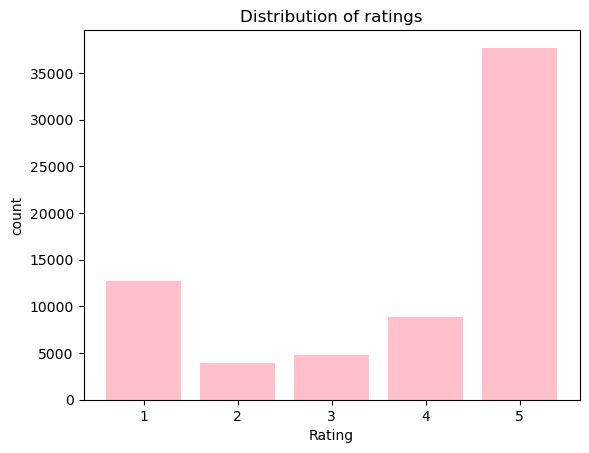

In [27]:
ratings_distribution = reviews['rating'].value_counts().sort_index()

plt.bar(ratings_distribution.index, ratings_distribution.values, color='pink')
plt.xlabel('Rating')
plt.ylabel('count')
plt.title('Distribution of ratings')
plt.show()

This diverse distribution suggests a range of opinions and experiences expressed by users, providing a nuanced perspective on the products under consideration. Analyzing this distribution will be crucial for understanding the overall sentiment patterns and addressing potential areas of improvement or concern.

# Price Distribution

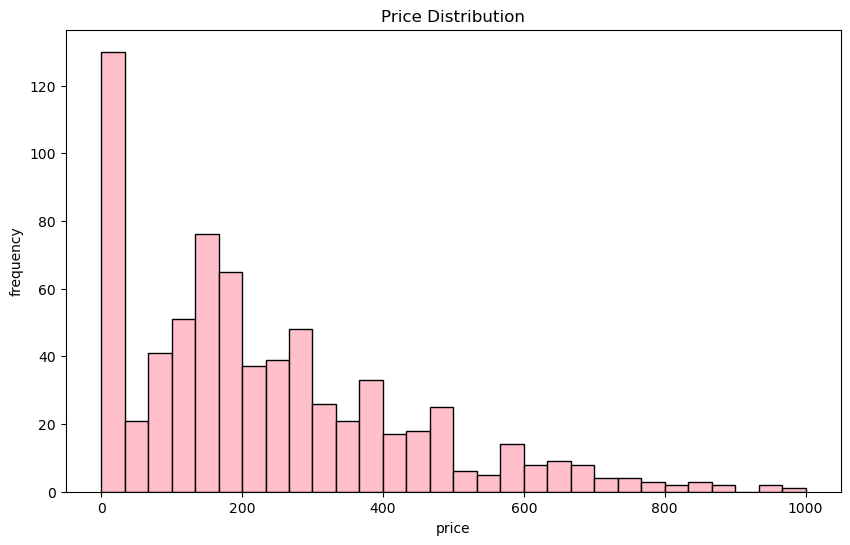

In [28]:
filtered_prices = items[items['price']< 1000]['price']

plt.figure(figsize=(10,6))
plt.hist(filtered_prices, bins=30, color='pink', edgecolor='black')
plt.xlabel('price')
plt.ylabel('frequency')
plt.title('Price Distribution')
plt.show()

In [29]:
zeroes_in_prices= (items['price']==0).sum()
zeroes_in_prices

124

Among the 720 items in the dataset, 124 products are recorded with a price of 0. This observation raises considerations about the nature of these zero-valued prices. Possible explanations include missing or unavailable price information, products offered for free or as part of promotions, data entry errors, outliers, or potential system glitches.

C:\Users\NEHA\AppData\Local\Temp\ipykernel_2780\3069282470.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items_non_zero_price['price_group'] = pd.cut(items_non_zero_price['price'],
C:\Users\NEHA\AppData\Local\Temp\ipykernel_2780\3069282470.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items_non_zero_price['price_group'] = items_non_zero_price['price_group'].cat.add_categories('unknown_price').fillna('unknown_price')


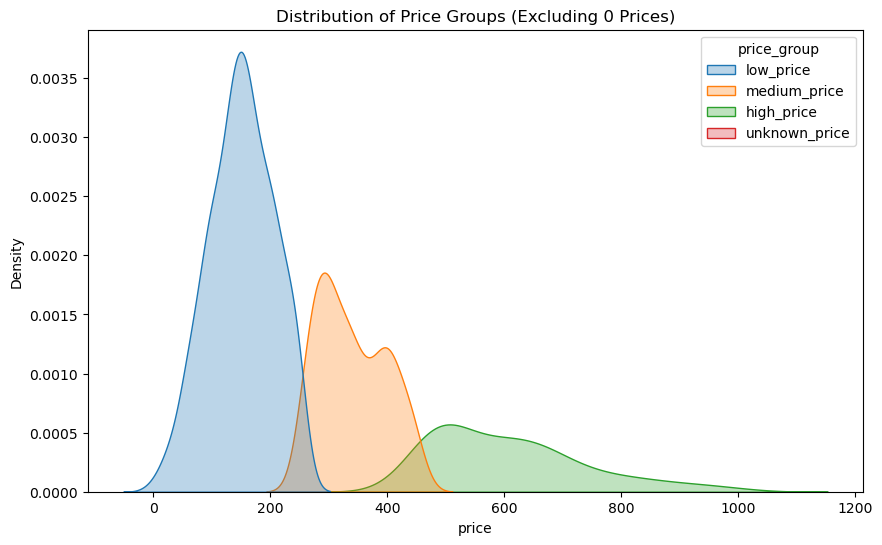

In [30]:
items_non_zero_price = items[items['price'] != 0]

items_non_zero_price['price_group'] = pd.cut(items_non_zero_price['price'], 
                                             bins=[-float('inf'), 250, 450, float('inf')], 
                                             labels=['low_price', 'medium_price', 'high_price'])

items_non_zero_price['price_group'] = items_non_zero_price['price_group'].cat.add_categories('unknown_price').fillna('unknown_price')

plt.figure(figsize=(10, 6))
sns.kdeplot(data=items_non_zero_price, x='price', hue='price_group', fill=True, alpha=0.3)
plt.title('Distribution of Price Groups (Excluding 0 Prices)')
plt.show()

# Brand Distribution

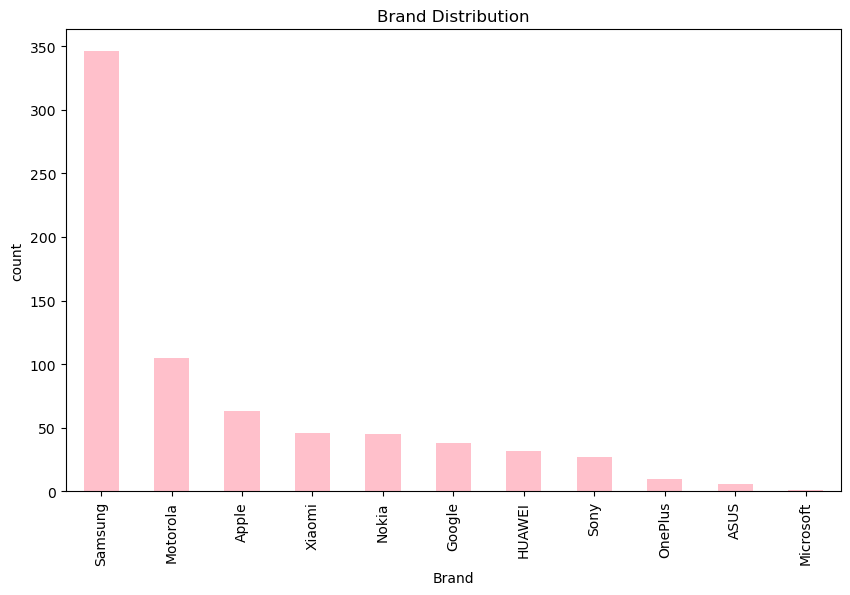

In [31]:
brand_counts = items['brand'].value_counts()

plt.figure(figsize=(10,6))
brand_counts.plot(kind='bar', color='pink')
plt.xlabel('Brand')
plt.ylabel('count')
plt.title('Brand Distribution')
plt.show()

Samsung stands out as the most popular brand, followed by Motorola and Apple in the dataset. This info helps in making decisions about what phones to stock, how to market them, and potential partnerships. Recognizing less common brands, like ASUS and Microsoft, allows for targeted efforts to boost their visibility. Understanding brand popularity guides smart decisions, making strategies more effective in the competitive smartphone market.

C:\Users\NEHA\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\NEHA\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 24.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


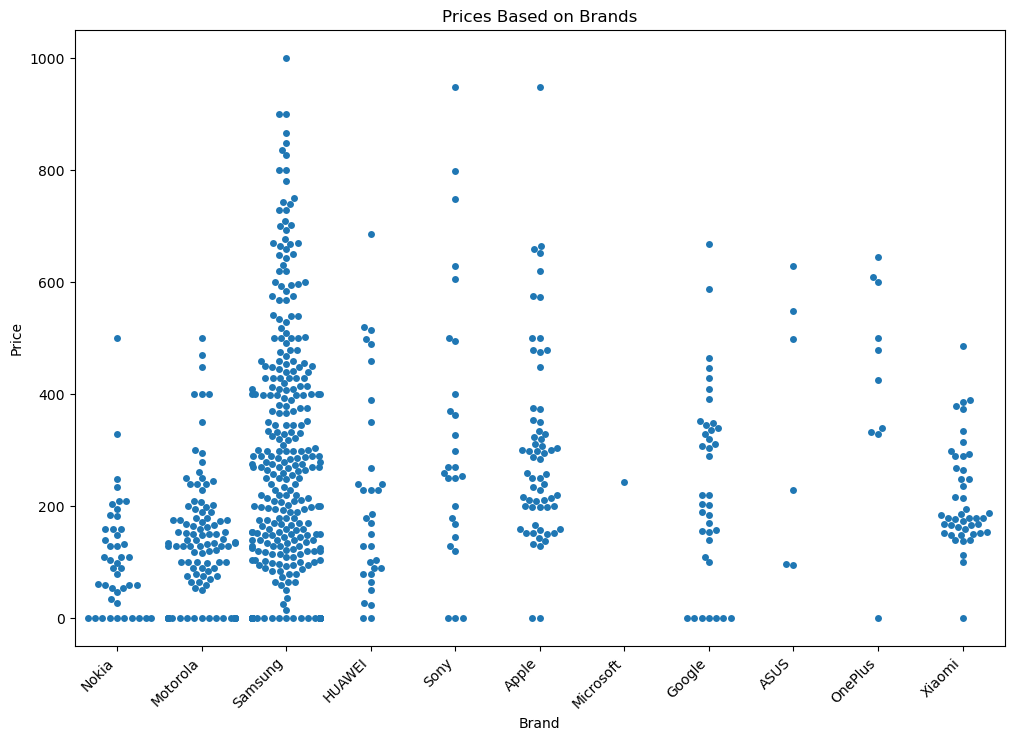

In [32]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x='brand', y='price', data=items)
plt.title('Prices Based on Brands')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Time Series Analysis

In [33]:
reviews['date'] = pd.to_datetime(reviews['date'], errors='coerce')

In [34]:
reviews_time_series = reviews.groupby('date').size().reset_index(name='review_count')

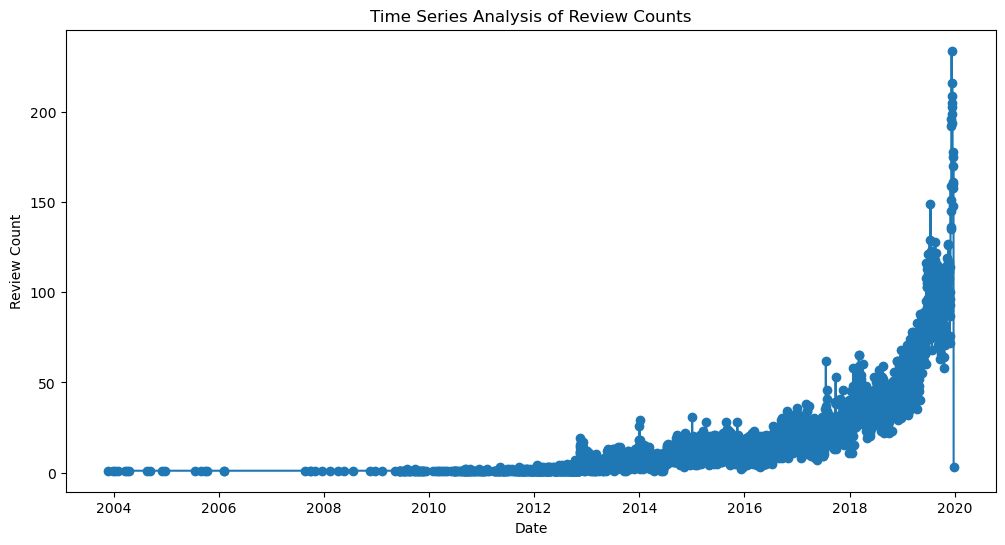

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(reviews_time_series['date'], reviews_time_series['review_count'], marker='o', linestyle='-')
plt.title('Time Series Analysis of Review Counts')
plt.xlabel('Date')
plt.ylabel('Review Count')
plt.show()


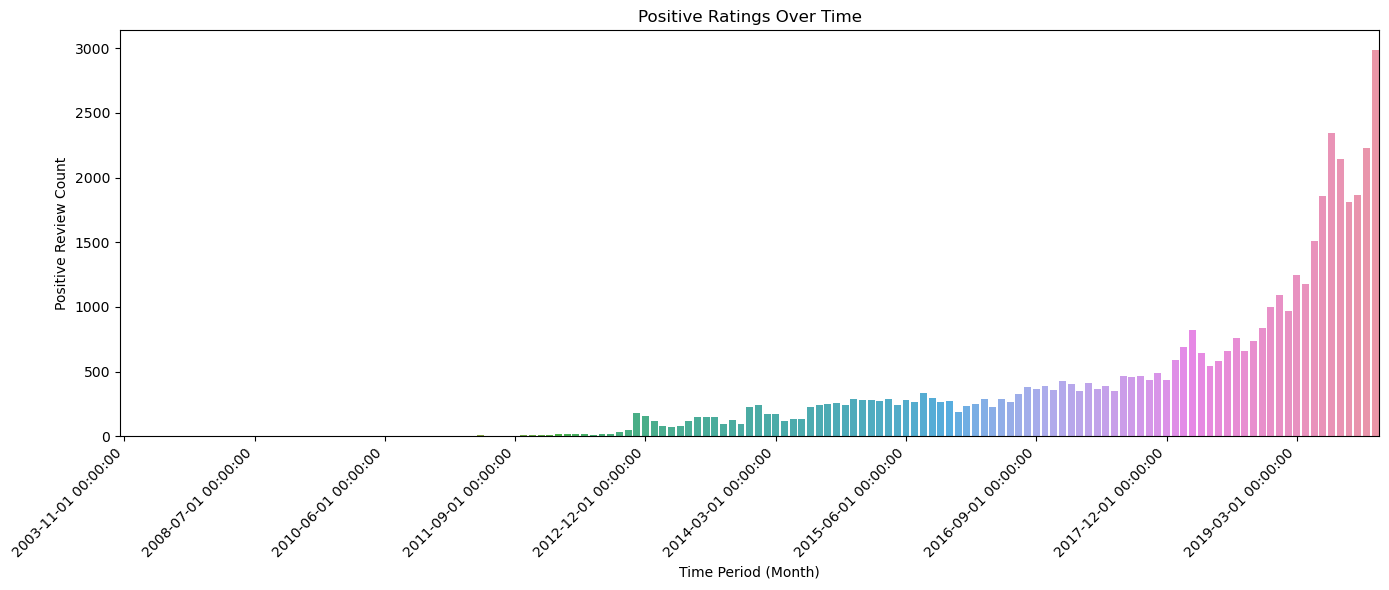

In [36]:
positive_reviews = reviews[reviews['rating'].isin([4, 5])]

positive_ratings_time_series = positive_reviews.groupby(reviews['date'].dt.to_period("M")).size().reset_index(name='positive_review_count')

plt.figure(figsize=(14, 6)) 
ax = sns.barplot(x=positive_ratings_time_series['date'].dt.to_timestamp(), y=positive_ratings_time_series['positive_review_count'])
plt.title('Positive Ratings Over Time')
plt.xlabel('Time Period (Month)')
plt.ylabel('Positive Review Count')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

ax.xaxis.set_major_locator(plt.MaxNLocator(10))  

plt.tight_layout()

plt.show()


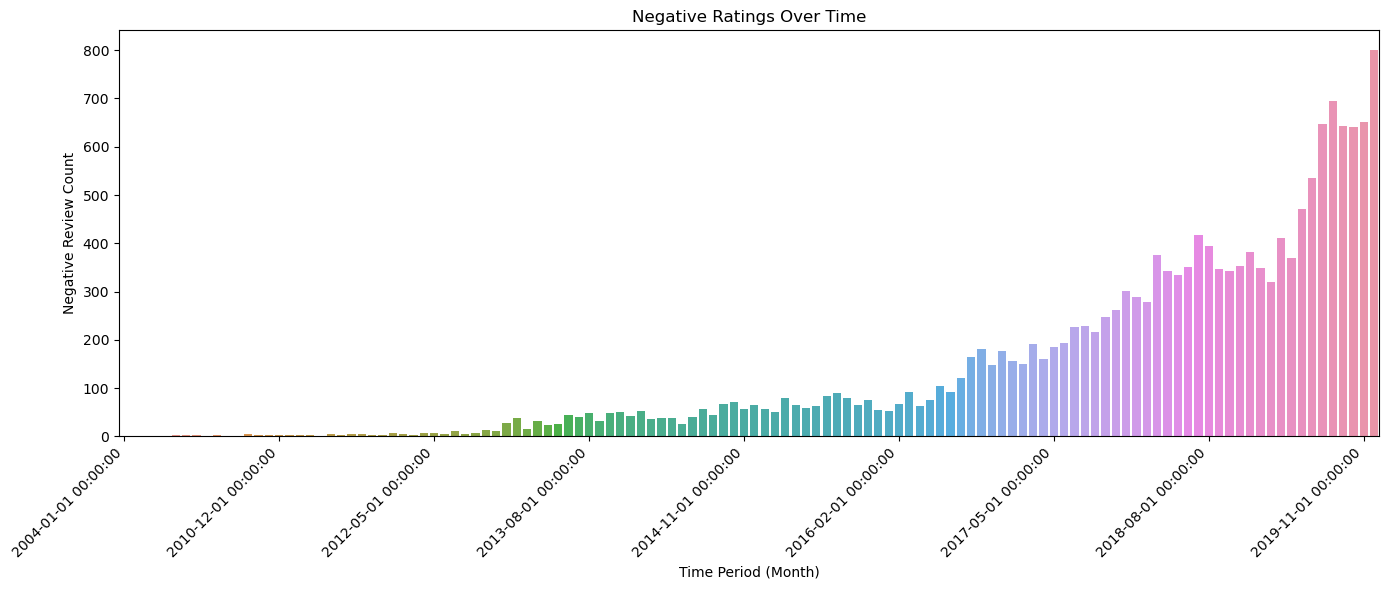

In [37]:
negative_reviews = reviews[reviews['rating'].isin([1, 2])]

negative_ratings_time_series = negative_reviews.groupby(reviews['date'].dt.to_period("M")).size().reset_index(name='negative_review_count')

plt.figure(figsize=(14, 6))
ax = sns.barplot(x=negative_ratings_time_series['date'].dt.to_timestamp(), y=negative_ratings_time_series['negative_review_count'])
plt.title('Negative Ratings Over Time')
plt.xlabel('Time Period (Month)')
plt.ylabel('Negative Review Count')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

ax.xaxis.set_major_locator(plt.MaxNLocator(10))

plt.tight_layout()

plt.show()


In [38]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

reviews['text'] = reviews['title'].fillna('') + ' ' + reviews['body'].fillna('')

In [39]:
reviews.head()

asin           name  rating       date  verified  \
0  B0000SX2UC          Janet       3 2005-10-11     False   
1  B0000SX2UC     Luke Wyatt       1 2004-01-07     False   
2  B0000SX2UC         Brooke       5 2003-12-30     False   
3  B0000SX2UC  amy m. teague       3 2004-03-18     False   
4  B0000SX2UC  tristazbimmer       4 2005-08-28     False   

                                          title  \
0                   Def not best, but not worst   
1                   Text Messaging Doesn't Work   
2                               Love This Phone   
3                       Love the Phone, BUT...!   
4  Great phone service and options, lousy case!   

                                                body  \
0  I had the Samsung A600 for awhile which is abs...   
1  Due to a software issue between Nokia and Spri...   
2  This is a great, reliable phone. I also purcha...   
3  I love the phone and all, because I really did...   
4  The phone has been great for every purpose it ...   

                                                text  
0  Def not best, but not worst I had the Samsung ...  
1  Text Messaging Doesn't Work Due to a software ...  
2  Love This Phone This is a great, reliable phon...  
3  Love the Phone, BUT...! I love the phone and a...  
4  Great phone service and options, lousy case! T...

# Text Preprocessing

In [40]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk import download

download('stopwords')
download('punkt')

def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Convert to lowercase
    text = text.lower()
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]
    
    processed_text = ' '.join(tokens)
    return processed_text

reviews['processed_text'] = reviews['text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NEHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NEHA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [41]:
reviews.head()

asin           name  rating       date  verified  \
0  B0000SX2UC          Janet       3 2005-10-11     False   
1  B0000SX2UC     Luke Wyatt       1 2004-01-07     False   
2  B0000SX2UC         Brooke       5 2003-12-30     False   
3  B0000SX2UC  amy m. teague       3 2004-03-18     False   
4  B0000SX2UC  tristazbimmer       4 2005-08-28     False   

                                          title  \
0                   Def not best, but not worst   
1                   Text Messaging Doesn't Work   
2                               Love This Phone   
3                       Love the Phone, BUT...!   
4  Great phone service and options, lousy case!   

                                                body  \
0  I had the Samsung A600 for awhile which is abs...   
1  Due to a software issue between Nokia and Spri...   
2  This is a great, reliable phone. I also purcha...   
3  I love the phone and all, because I really did...   
4  The phone has been great for every purpose it ...   

                                                text  \
0  Def not best, but not worst I had the Samsung ...   
1  Text Messaging Doesn't Work Due to a software ...   
2  Love This Phone This is a great, reliable phon...   
3  Love the Phone, BUT...! I love the phone and a...   
4  Great phone service and options, lousy case! T...   

                                      processed_text  
0  def best worst samsung awhile absolute doo doo...  
1  text messaging doesnt work due software issue ...  
2  love phone great reliable phone also purchased...  
3  love phone love phone really need one didnt ex...  
4  great phone service options lousy case phone g...

In [42]:
#!pip install transformers

In [43]:
#!pip install torch

In [44]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification

In [45]:
#!pip install --upgrade transformers

# Sentiment Analysis

In [47]:
from transformers import AutoTokenizer

model_name = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

C:\Users\NEHA\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\NEHA\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [49]:
from transformers import AutoModelForSequenceClassification

model_name = 'bert-base-uncased'
model = AutoModelForSequenceClassification.from_pretrained(model_name)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [50]:
from tqdm import tqdm

batch_size = 64

all_predictions = []

for i in tqdm(range(0, len(reviews), batch_size)):
    batch_data = reviews['processed_text'][i:i+batch_size].tolist()
    encoded_reviews = tokenizer(batch_data, padding=True, truncation=True, return_tensors='pt', max_length=128)
    with torch.no_grad():
        outputs = model(**encoded_reviews)
        predictions = torch.argmax(outputs.logits, dim=1).numpy()

    all_predictions.extend(predictions.tolist())

reviews['predicted_sentiment'] = all_predictions

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1062/1062 [10:43:30<00:00, 36.36s/it]


In [51]:
reviews.head()

asin           name  rating       date  verified  \
0  B0000SX2UC          Janet       3 2005-10-11     False   
1  B0000SX2UC     Luke Wyatt       1 2004-01-07     False   
2  B0000SX2UC         Brooke       5 2003-12-30     False   
3  B0000SX2UC  amy m. teague       3 2004-03-18     False   
4  B0000SX2UC  tristazbimmer       4 2005-08-28     False   

                                          title  \
0                   Def not best, but not worst   
1                   Text Messaging Doesn't Work   
2                               Love This Phone   
3                       Love the Phone, BUT...!   
4  Great phone service and options, lousy case!   

                                                body  \
0  I had the Samsung A600 for awhile which is abs...   
1  Due to a software issue between Nokia and Spri...   
2  This is a great, reliable phone. I also purcha...   
3  I love the phone and all, because I really did...   
4  The phone has been great for every purpose it ...   

                                                text  \
0  Def not best, but not worst I had the Samsung ...   
1  Text Messaging Doesn't Work Due to a software ...   
2  Love This Phone This is a great, reliable phon...   
3  Love the Phone, BUT...! I love the phone and a...   
4  Great phone service and options, lousy case! T...   

                                      processed_text  predicted_sentiment  
0  def best worst samsung awhile absolute doo doo...                    0  
1  text messaging doesnt work due software issue ...                    1  
2  love phone great reliable phone also purchased...                    1  
3  love phone love phone really need one didnt ex...                    1  
4  great phone service options lousy case phone g...                    1

In [63]:
reviews.sample()

asin              name  rating       date  verified  \
19293  B018OMP8ES  miserybusiness52       5 2017-06-01      True   

                                            title  \
19293  Was very happy to find my replacement here   

                                                    body  \
19293  Made the mistake of switiching from my Note 5 ...   

                                                    text  \
19293  Was very happy to find my replacement here Mad...   

                                          processed_text  predicted_sentiment  
19293  happy find replacement made mistake switiching...                    1

In [62]:
reviews.to_csv('updated_reviews_with_sentiments.csv', index=False)

In [54]:
!pip install textblob

     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
     ----- --------------------------------- 92.2/636.8 kB 2.6 MB/s eta 0:00:01
     ----------------------------- -------- 491.5/636.8 kB 6.2 MB/s eta 0:00:01
     ----------------------------- -------- 491.5/636.8 kB 6.2 MB/s eta 0:00:01
     -------------------------------------  634.9/636.8 kB 3.3 MB/s eta 0:00:01
     -------------------------------------- 636.8/636.8 kB 2.9 MB/s eta 0:00:00


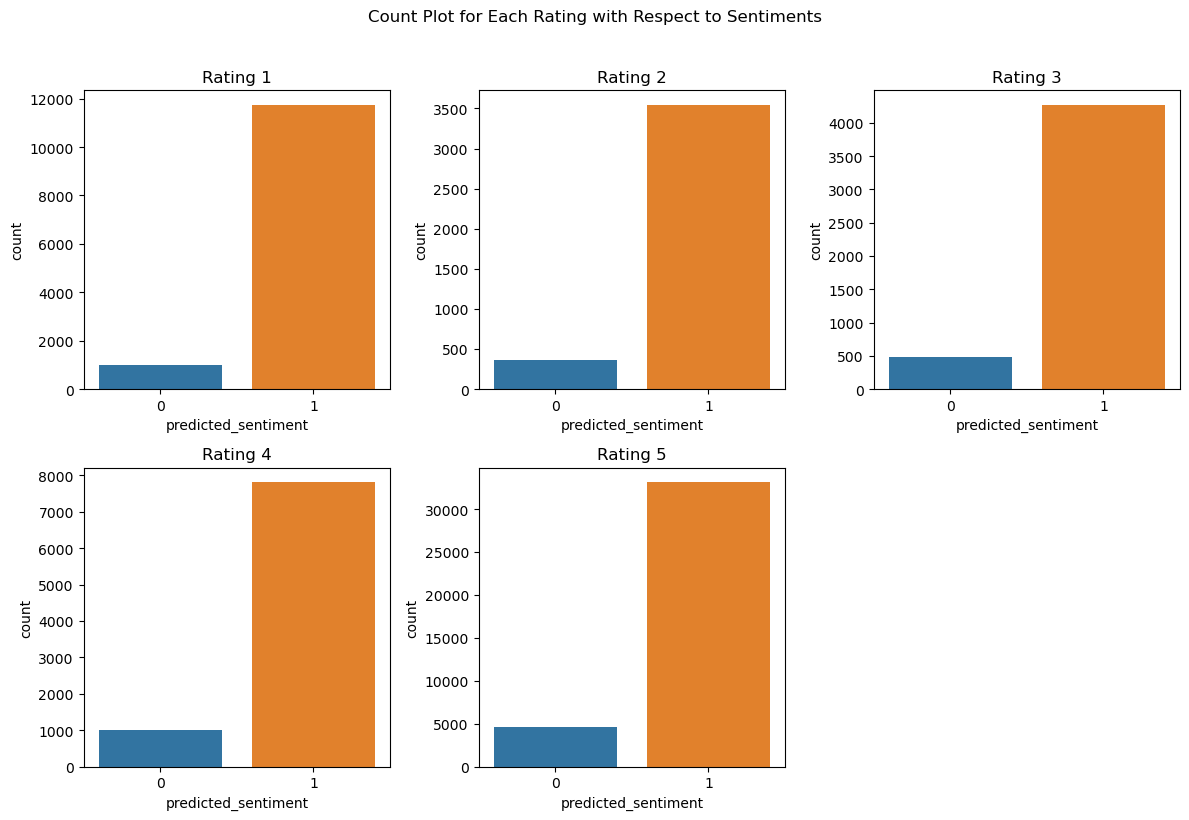

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for rating in sorted(reviews['rating'].unique()):
    plt.subplot(2, 3, rating)
    subset = reviews[reviews['rating'] == rating]
    sns.countplot(x='predicted_sentiment', data=subset)
    plt.title(f'Rating {rating}')

plt.suptitle('Count Plot for Each Rating with Respect to Sentiments', y=1.02)
plt.tight_layout()
plt.show()

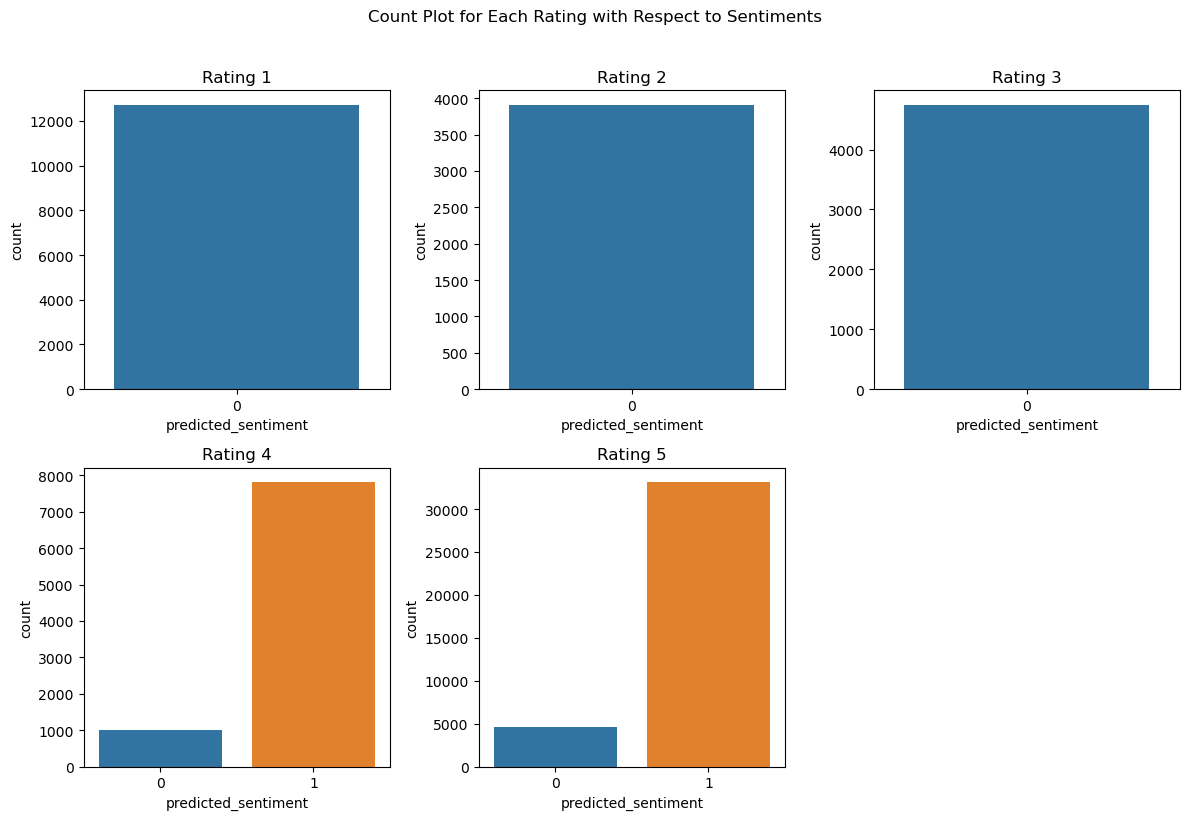

In [35]:
reviews.loc[reviews['rating'].isin([1, 2, 3]), 'predicted_sentiment'] = 0

plt.figure(figsize=(12, 8))
for rating in sorted(reviews['rating'].unique()):
    plt.subplot(2, 3, rating)
    subset = reviews[reviews['rating'] == rating]
    sns.countplot(x='predicted_sentiment', data=subset)
    plt.title(f'Rating {rating}')

plt.suptitle('Count Plot for Each Rating with Respect to Sentiments', y=1.02)
plt.tight_layout()
plt.show()

In [36]:
reviews['predicted_sentiment'].value_counts()

predicted_sentiment
1    40960
0    26973
Name: count, dtype: int64

In [37]:
reviews.to_csv('product_reviews.csv', index=False)

In [38]:
reviews=pd.read_csv('product_reviews.csv')
reviews.head()

asin           name  rating        date  verified  \
0  B0000SX2UC          Janet       3  11-10-2005     False   
1  B0000SX2UC     Luke Wyatt       1  07-01-2004     False   
2  B0000SX2UC         Brooke       5  30-12-2003     False   
3  B0000SX2UC  amy m. teague       3  18-03-2004     False   
4  B0000SX2UC  tristazbimmer       4  28-08-2005     False   

                                          title  \
0                   Def not best, but not worst   
1                   Text Messaging Doesn't Work   
2                               Love This Phone   
3                       Love the Phone, BUT...!   
4  Great phone service and options, lousy case!   

                                                body  \
0  I had the Samsung A600 for awhile which is abs...   
1  Due to a software issue between Nokia and Spri...   
2  This is a great, reliable phone. I also purcha...   
3  I love the phone and all, because I really did...   
4  The phone has been great for every purpose it ...   

                                                text  \
0  Def not best, but not worst I had the Samsung ...   
1  Text Messaging Doesn't Work Due to a software ...   
2  Love This Phone This is a great, reliable phon...   
3  Love the Phone, BUT...! I love the phone and a...   
4  Great phone service and options, lousy case! T...   

                                      processed_text  predicted_sentiment  
0  def best worst samsung awhile absolute doo doo...                    0  
1  text messaging doesnt work due software issue ...                    0  
2  love phone great reliable phone also purchased...                    1  
3  love phone love phone really need one didnt ex...                    0  
4  great phone service options lousy case phone g...                    1

In [21]:
#!pip install --upgrade tensorflow keras

  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/ca/48/643d21747d52fa380f572f76c493779fc5b4bd03605247209d2dd0a6d9a9/keras-3.0.2-py3-none-any.whl.metadata


# Model

In [6]:
texts = reviews['processed_text'].values
labels = reviews['predicted_sentiment'].values

In [39]:
def preprocess_text(text):
    if isinstance(text, str):
        return text.lower()
    else:
        return str(text).lower()

texts = [preprocess_text(text) for text in texts]

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [ ]:
max_words = 10000 
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)

tokenizer_json = tokenizer.to_json()
with open('tokenizer_17.json', 'w', encoding='utf-8') as f:
    f.write(tokenizer_json)

sequences = tokenizer.texts_to_sequences(texts)

max_len = 100  
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

In [ ]:
glove_path = r'D:\NEHA\Data Science Project\glove.6B.200d.txt'

embeddings_index = {}
with open(glove_path, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

embedding_dim = 200  
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [40]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=False))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

epochs = 100
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), callbacks=[early_stopping])

loss, accuracy = model.evaluate(X_test, y_test)

Epoch 1/100
1699/1699 [==============================] - 151s 85ms/step - loss: 0.6611 - accuracy: 0.6156 - val_loss: 0.6577 - val_accuracy: 0.6218
Epoch 2/100
1699/1699 [==============================] - 139s 82ms/step - loss: 0.4385 - accuracy: 0.7961 - val_loss: 0.4084 - val_accuracy: 0.8106
Epoch 3/100
1699/1699 [==============================] - 148s 87ms/step - loss: 0.3767 - accuracy: 0.8279 - val_loss: 0.3569 - val_accuracy: 0.8430
Epoch 4/100
1699/1699 [==============================] - 147s 86ms/step - loss: 0.3497 - accuracy: 0.8455 - val_loss: 0.3547 - val_accuracy: 0.8440
Epoch 5/100
1699/1699 [==============================] - 147s 87ms/step - loss: 0.4102 - accuracy: 0.8155 - val_loss: 0.3491 - val_accuracy: 0.8449
Epoch 6/100
1699/1699 [==============================] - 144s 85ms/step - loss: 0.3275 - accuracy: 0.8577 - val_loss: 0.3425 - val_accuracy: 0.8510
Epoch 7/100
1699/1699 [==============================] - 149s 88ms/step - loss: 0.3061 - accuracy: 0.8685 - val_

In [41]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

In [42]:
print(f'Final Training Accuracy: {training_accuracy[-1] * 100:.2f}%')
print(f'Final Validation Accuracy: {validation_accuracy[-1] * 100:.2f}%')

Final Training Accuracy: 90.62%
Final Validation Accuracy: 85.66%


In [43]:
model.save('lstm_model_17.h5')

C:\Users\NEHA\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [49]:
import json
from keras.models import load_model
from keras.preprocessing.text import tokenizer_from_json

loaded_model = load_model('lstm_model_17.h5')

with open('tokenizer_17.json', 'r', encoding='utf-8') as f:
    tokenizer_json_str = f.read()
    loaded_tokenizer = tokenizer_from_json(tokenizer_json_str)

In [56]:
new_reviews = ["the battery is not working properly. bad experience",
              "The product exceeded my expectations. I'm very satisfied with my purchase.",
"Terrible quality. I regret spending money on this item.",
"Not bad, but not great either. It's just okay.",
"Absolutely amazing! I love everything about it.",
"Waste of money. The worst product I've ever bought.",
"Good value for the price. I would recommend it to others.",
"I had high hopes, but the product fell short of my expectations.",
"Exceptional quality and performance. I'm impressed.",
"I can't believe how poorly made this product is. It broke after a few uses.",
"Excellent customer service. They promptly addressed my concerns."]

sequences = loaded_tokenizer.texts_to_sequences(new_reviews)
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

predictions = loaded_model.predict(padded_sequences)

predicted_labels = [0 if prediction < 0.5 else 1 for prediction in predictions]

for review, label in zip(new_reviews, predicted_labels):
    sentiment = "Positive" if label == 1 else "Negative"
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")


1/1 [==============================] - 0s 40ms/step
Review: the battery is not working properly. bad experience
Predicted Sentiment: Negative

Review: The product exceeded my expectations. I'm very satisfied with my purchase.
Predicted Sentiment: Positive

Review: Terrible quality. I regret spending money on this item.
Predicted Sentiment: Negative

Review: Not bad, but not great either. It's just okay.
Predicted Sentiment: Negative

Review: Absolutely amazing! I love everything about it.
Predicted Sentiment: Positive

Review: Waste of money. The worst product I've ever bought.
Predicted Sentiment: Negative

Review: Good value for the price. I would recommend it to others.
Predicted Sentiment: Positive

Review: I had high hopes, but the product fell short of my expectations.
Predicted Sentiment: Negative

Review: Exceptional quality and performance. I'm impressed.
Predicted Sentiment: Positive

Review: I can't believe how poorly made this product is. It broke after a few uses.
Predicte

In [59]:
with open('tokenizer_17.json', 'r', encoding='utf-8') as f:
    tokenizer_json = f.read()
    loaded_tokenizer = tokenizer_from_json(tokenizer_json)

loaded_model = load_model('lstm_model_17.h5')

max_len = 100 

def generate_response(sentiment):
    if sentiment == 'Positive':
        responses = [
            "Thank you for your positive feedback! We're thrilled to hear that you had a great experience with our product.",
            "We're delighted that you love our product! We look forward to serving you again in the future.",
            "We appreciate your positive review. It means a lot to us!",
            "As a token of our appreciation, here's a discount code for your next purchase. Thank you for choosing us!"
        ]
    elif sentiment == 'Negative':
        responses = [
            "We apologize for the inconvenience you've experienced. Please be assured that we take your feedback seriously.",
            "We're sorry to hear about the issue with the product. Our team is working to resolve this, and we appreciate your patience.",
            "Thank you for bringing this to our attention. Your feedback helps us improve, and we're committed to making things right.",
            "We understand your frustration. We'd like to offer you a refund or a replacement. Please contact our customer support for assistance."
        ]
    else:
        responses = ["Invalid sentiment. Please provide 'Positive' or 'Negative'."]

    return responses


def get_user_input():
    user_review = input("Enter your review: ")
    return user_review


def main():
    new_reviews = [
        "the battery is not working properly. bad experience",
        "The product exceeded my expectations. I'm very satisfied with my purchase.",
        "Terrible quality. I regret spending money on this item.",
        "Not bad, but not great either. It's just okay.",
        "Absolutely amazing! I love everything about it.",
        "Waste of money. The worst product I've ever bought.",
        "Good value for the price. I would recommend it to others.",
        "I had high hopes, but the product fell short of my expectations.",
        "Exceptional quality and performance. I'm impressed.",
        "I can't believe how poorly made this product is. It broke after a few uses.",
        "Excellent customer service. They promptly addressed my concerns."
    ]

    for review in new_reviews:
        sequences = loaded_tokenizer.texts_to_sequences([review])
        padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')
        
        predictions = loaded_model.predict(padded_sequences)
        predicted_label = 1 if predictions[0] >= 0.5 else 0

        sentiment = "Positive" if predicted_label == 1 else "Negative"
        responses = generate_response(sentiment)

        print(f"Review: {review}")
        print(f"Predicted Sentiment: {sentiment}")
        print(f"Selected Response: {responses[0]}\n")


if __name__ == "__main__":
    main()



1/1 [==============================] - 1s 588ms/step
Review: the battery is not working properly. bad experience
Predicted Sentiment: Negative
Selected Response: We apologize for the inconvenience you've experienced. Please be assured that we take your feedback seriously.

1/1 [==============================] - 0s 34ms/step
Review: The product exceeded my expectations. I'm very satisfied with my purchase.
Predicted Sentiment: Positive
Selected Response: Thank you for your positive feedback! We're thrilled to hear that you had a great experience with our product.

1/1 [==============================] - 0s 38ms/step
Review: Terrible quality. I regret spending money on this item.
Predicted Sentiment: Negative
Selected Response: We apologize for the inconvenience you've experienced. Please be assured that we take your feedback seriously.

1/1 [==============================] - 0s 32ms/step
Review: Not bad, but not great either. It's just okay.
Predicted Sentiment: Negative
Selected Respons

In [60]:
with open('tokenizer_17.json', 'r', encoding='utf-8') as f:
    tokenizer_json = f.read()
    loaded_tokenizer = tokenizer_from_json(tokenizer_json)

loaded_model = load_model('lstm_model_17.h5')

max_len = 100  

def generate_response(sentiment):
    if sentiment == 'Positive':
        responses = [
            "Thank you for your positive feedback! We're thrilled to hear that you had a great experience with our product.",
            "We're delighted that you love our product! We look forward to serving you again in the future.",
            "We appreciate your positive review. It means a lot to us!",
            "As a token of our appreciation, here's a discount code for your next purchase. Thank you for choosing us!"
        ]
    elif sentiment == 'Negative':
        responses = [
            "We apologize for the inconvenience you've experienced. Please be assured that we take your feedback seriously.",
            "We're sorry to hear about the issue with the product. Our team is working to resolve this, and we appreciate your patience.",
            "Thank you for bringing this to our attention. Your feedback helps us improve, and we're committed to making things right.",
            "We understand your frustration. We'd like to offer you a refund or a replacement. Please contact our customer support for assistance."
        ]
    else:
        responses = ["Invalid sentiment. Please provide 'Positive' or 'Negative'."]

    return responses


def get_user_input():
    user_review = input("Enter your review: ")
    return user_review


def main():
    while True:
        user_review = get_user_input()

        if user_review.lower() == 'exit':
            break

        sequences = loaded_tokenizer.texts_to_sequences([user_review])
        padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')
        
        predictions = loaded_model.predict(padded_sequences)
        predicted_label = 1 if predictions[0] >= 0.5 else 0

        sentiment = "Positive" if predicted_label == 1 else "Negative"
        responses = generate_response(sentiment)

        print(f"Review: {user_review}")
        print(f"Predicted Sentiment: {sentiment}")
        print(f"Selected Response: {responses[0]}\n")


if __name__ == "__main__":
    main()


Enter your review: bad experience. dont buy from this company
1/1 [==============================] - 1s 587ms/step
Review: bad experience. dont buy from this company
Predicted Sentiment: Negative
Selected Response: We apologize for the inconvenience you've experienced. Please be assured that we take your feedback seriously.

Enter your review: the battery is not working properly
1/1 [==============================] - 0s 31ms/step
Review: the battery is not working properly
Predicted Sentiment: Negative
Selected Response: We apologize for the inconvenience you've experienced. Please be assured that we take your feedback seriously.

Enter your review: good. phone. storage is also good
1/1 [==============================] - 0s 31ms/step
Review: good. phone. storage is also good
Predicted Sentiment: Positive
Selected Response: Thank you for your positive feedback! We're thrilled to hear that you had a great experience with our product.

Enter your review: horrible experience
1/1 [=========

KeyboardInterrupt: Interrupted by user